In [53]:
import numpy as np
import matplotlib.pyplot as plt

def decode_sequence(signal):
    ans = []
    for idx in range(0, len(signal), 6):
        tail_idx = idx + 6
        if tail_idx > len(signal):
            break
        fft_output = np.fft.fft(signal[idx:tail_idx])
        if fft_output[2] >= fft_output[3]:
            ans.append(0)
        else:
            ans.append(1)
    return ans

In [7]:
intensity_file = "intensity.txt"
inst_data = []
with open(intensity_file, 'r') as input_file:
    for line in input_file:
        parsed = line.strip().split(' ')
        if len(parsed) >= 3 and parsed[0] == 'average' and parsed[1] == 'color':
            inst_data.append(float(parsed[2]))

In [8]:
len(inst_data)

439

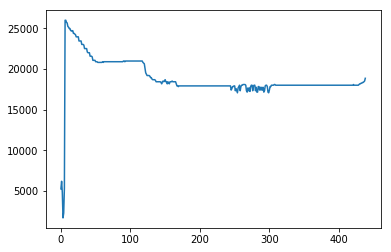

In [22]:
plt.plot(inst_data)
# plt.xlim(240, 310)
# plt.ylim(17000, 18500)

(17000, 18500)

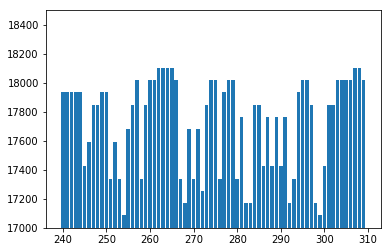

In [21]:
plt.bar(range(240, 310), inst_data[240:310])
plt.ylim(17000, 18500)

In [23]:
start_idx = 243
np.absolute(np.fft.fft(inst_data[start_idx:(start_idx + 12)]))

array([2.11820000e+05, 1.25365850e+03, 1.19000000e+03, 8.75128562e+02,
       1.36000000e+03, 4.69191195e+02, 1.70000000e+02, 4.69191195e+02,
       1.36000000e+03, 8.75128562e+02, 1.19000000e+03, 1.25365850e+03])

In [34]:
start_idx = 244
np.absolute(np.fft.fft(inst_data[start_idx:(start_idx + 12)]))

array([211565.        ,   1443.23921574,    957.90135191,    783.66127887,
         1252.12818833,    235.92491632,    425.        ,    235.92491632,
         1252.12818833,    783.66127887,    957.90135191,   1443.23921574])

## Evaluation

In [69]:
# ground truth
data_sequences = [[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
 [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]]
correct_data_sequences = [i[3:] for i in data_sequences]

In [70]:
def accuracy_for_one(correct_data_sequences, input_sequences):
    all_result = []
    for seq_i in input_sequences:
        seq_i_results = []
        for seq_j in correct_data_sequences:
            # number of bits that is correct
            seq_i_results.append(len([(i, j) for i, j in zip(seq_i, seq_j) if i==j]))
        all_result.append(max(seq_i_results) / len(seq_i))
    
    top_all_result = sorted(all_result, reverse=True)[:len(correct_data_sequences)]
    return sum(top_all_result) / len(top_all_result)

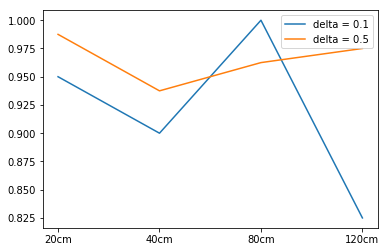

In [75]:
import matplotlib.pyplot as plt
accu_delta_1_20 = accuracy_for_one(correct_data_sequences, delta_1_20)
accu_delta_1_40 = accuracy_for_one(correct_data_sequences, delta_1_40)
accu_delta_1_80 = accuracy_for_one(correct_data_sequences, delta_1_80)
accu_delta_1_120 = accuracy_for_one(correct_data_sequences, delta_1_120)
plt.plot(["20cm", "40cm", "80cm", "120cm"], [accu_delta_1_20, accu_delta_1_40, accu_delta_1_80, accu_delta_1_120], label="delta = 0.1")

accu_delta_5_20 = accuracy_for_one(correct_data_sequences, delta_5_20)
accu_delta_5_40 = accuracy_for_one(correct_data_sequences, delta_5_40)
accu_delta_5_80 = accuracy_for_one(correct_data_sequences, delta_5_80)
accu_delta_5_120 = accuracy_for_one(correct_data_sequences, delta_5_120)
plt.plot(["20cm", "40cm", "80cm", "120cm"], [accu_delta_5_20, accu_delta_5_40, accu_delta_5_80, accu_delta_5_120], label="delta = 0.5")
plt.legend()
plt.savefig("error_rate_vs_dis.png")

In [64]:
## Data loading for delta of 0
delta_1_20 = \
    [[0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]

delta_1_40 = \
    [[1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 1, 1, 1, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]

delta_1_80 = \
    [[0, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]

delta_1_120 = \
    [[0, 1, 0, 1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 1, 1, 0, 1, 1, 0, 1]]

In [73]:
delta_5_20 =\
    [[1, 1, 1, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]
delta_5_40 =\
    [[1, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]
delta_5_80 =\
    [[1, 0, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]
delta_5_120 =\
    [[0, 0, 1, 0, 1, 0, 1, 1],
    [0, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0]]